3: CIFAR-10 Photo Classification Dataset

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 173s 1us/step


In [3]:
X_train=X_train/255.0

In [4]:
X_test=X_test/255.0

In [5]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [6]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(50000, 32, 32, 3) (50000, 10)
(10000, 32, 32, 3) (10000, 10)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,MaxPooling2D,Flatten,Conv2D
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

2023-03-14 19:42:44.861300: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [9]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history=model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
352/352 [==============================] - 29s 79ms/step - loss: 2.0115 - accuracy: 0.2098 - val_loss: 1.6667 - val_accuracy: 0.3556
Epoch 2/10
352/352 [==============================] - 29s 82ms/step - loss: 1.6526 - accuracy: 0.3700 - val_loss: 1.4404 - val_accuracy: 0.4564
Epoch 3/10
352/352 [==============================] - 29s 82ms/step - loss: 1.4565 - accuracy: 0.4646 - val_loss: 1.3462 - val_accuracy: 0.5166
Epoch 4/10
352/352 [==============================] - 31s 87ms/step - loss: 1.3420 - accuracy: 0.5200 - val_loss: 1.1575 - val_accuracy: 0.5844
Epoch 5/10
352/352 [==============================] - 29s 84ms/step - loss: 1.2617 - accuracy: 0.5533 - val_loss: 1.1608 - val_accuracy: 0.5914
Epoch 6/10
352/352 [==============================] - 29s 83ms/step - loss: 1.1976 - accuracy: 0.5798 - val_loss: 1.1326 - val_accuracy: 0.6096
Epoch 7/10
352/352 [==============================] - 31s 87ms/step - loss: 1.1459 - accuracy: 0.6006 - val_loss: 1.0221 - val_accuracy:

In [11]:
score=model.evaluate(X_test, y_test, batch_size=10, verbose=1)

1000/1000 [==============================] - 3s 3ms/step - loss: 0.9925 - accuracy: 0.6517


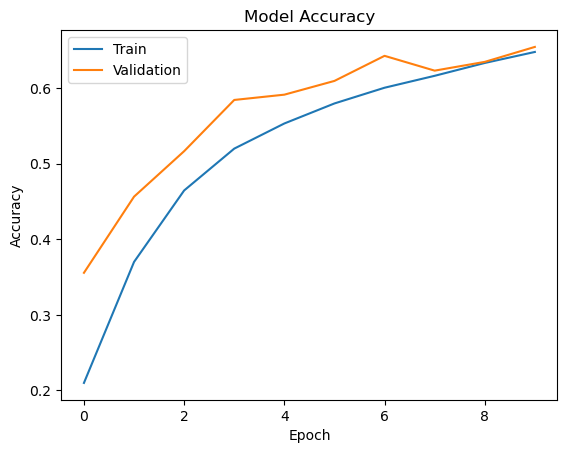

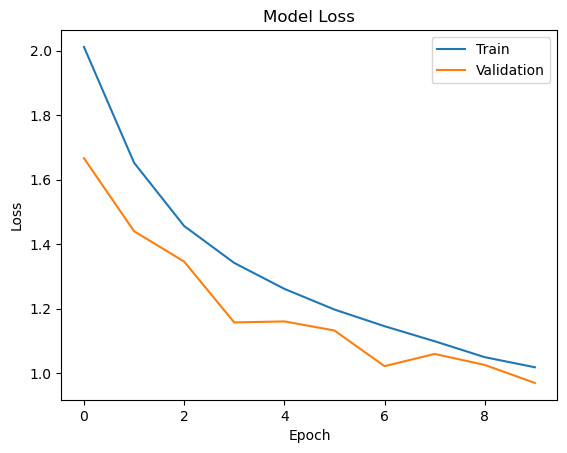

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Using Data Augmentation , generating more data and building the model again

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=15,width_shift_range=0.1,height_shift_range=0.1,
    horizontal_flip=True,vertical_flip=False,fill_mode='nearest')

In [15]:
model1=Sequential()
model1.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(128,activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10,activation='softmax'))

In [16]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 2, 2, 64)        

In [17]:
model1.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history1=model1.fit(datagen.flow(X_train, y_train, batch_size=128), epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
391/391 [==============================] - 50s 125ms/step - loss: 2.0309 - accuracy: 0.1992 - val_loss: 1.7465 - val_accuracy: 0.3288
Epoch 2/10
391/391 [==============================] - 45s 114ms/step - loss: 1.7295 - accuracy: 0.3375 - val_loss: 1.4987 - val_accuracy: 0.4312
Epoch 3/10
391/391 [==============================] - 46s 117ms/step - loss: 1.5558 - accuracy: 0.4190 - val_loss: 1.3115 - val_accuracy: 0.5052
Epoch 4/10
391/391 [==============================] - 51s 129ms/step - loss: 1.4659 - accuracy: 0.4586 - val_loss: 1.2663 - val_accuracy: 0.5388
Epoch 5/10
391/391 [==============================] - 53s 135ms/step - loss: 1.3951 - accuracy: 0.4936 - val_loss: 1.1620 - val_accuracy: 0.5769
Epoch 6/10
391/391 [==============================] - 46s 119ms/step - loss: 1.3360 - accuracy: 0.5238 - val_loss: 1.1391 - val_accuracy: 0.5929
Epoch 7/10
391/391 [==============================] - 44s 113ms/step - loss: 1.2953 - accuracy: 0.5439 - val_loss: 1.1868 - val_ac

In [21]:
score1=model1.evaluate(X_test, y_test, batch_size=10, verbose=1)

1000/1000 [==============================] - 3s 3ms/step - loss: 1.0272 - accuracy: 0.6331


In [22]:
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 1.0272411108016968
Test accuracy: 0.6330999732017517


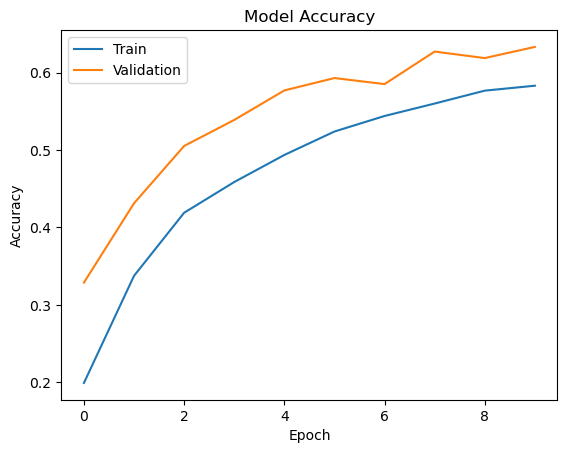

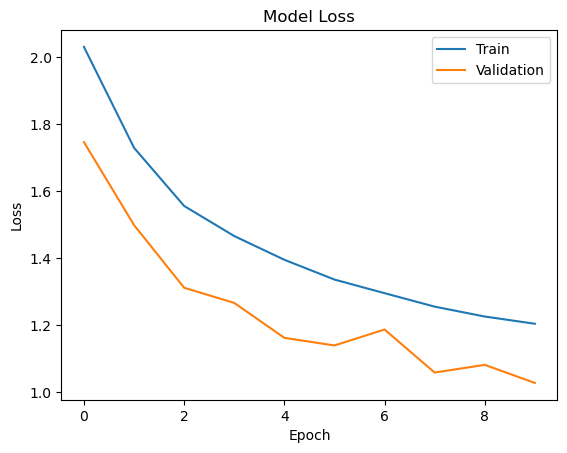

In [23]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Applying Dropout , Data Augmentation and Batch Normalization and building the model

In [25]:
from tensorflow.keras.layers import BatchNormalization
model2=Sequential()
model2.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(128,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(128,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(128,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(10,activation='softmax'))

In [26]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 64)       256       
 hNormalization)                                                 
                                                      

In [27]:
model2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
history2=model2.fit(datagen.flow(X_train, y_train, batch_size=128), epochs=50, validation_data=(X_test,y_test))

Epoch 1/50
391/391 [==============================] - 70s 173ms/step - loss: 2.2313 - accuracy: 0.2491 - val_loss: 2.2216 - val_accuracy: 0.2397
Epoch 2/50
391/391 [==============================] - 71s 182ms/step - loss: 1.6425 - accuracy: 0.3900 - val_loss: 1.6680 - val_accuracy: 0.4032
Epoch 3/50
391/391 [==============================] - 70s 178ms/step - loss: 1.4635 - accuracy: 0.4698 - val_loss: 1.2720 - val_accuracy: 0.5427
Epoch 4/50
391/391 [==============================] - 70s 179ms/step - loss: 1.3562 - accuracy: 0.5167 - val_loss: 1.7096 - val_accuracy: 0.4585
Epoch 5/50
391/391 [==============================] - 69s 177ms/step - loss: 1.2748 - accuracy: 0.5503 - val_loss: 1.5580 - val_accuracy: 0.4965
Epoch 6/50
391/391 [==============================] - 70s 179ms/step - loss: 1.2111 - accuracy: 0.5749 - val_loss: 1.1081 - val_accuracy: 0.6057
Epoch 7/50
391/391 [==============================] - 74s 189ms/step - loss: 1.1583 - accuracy: 0.5962 - val_loss: 1.3541 - val_ac

In [29]:
score2=model2.evaluate(X_test, y_test, batch_size=10, verbose=1)

1000/1000 [==============================] - 7s 7ms/step - loss: 0.8023 - accuracy: 0.7326


In [30]:
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.802253246307373
Test accuracy: 0.7325999736785889


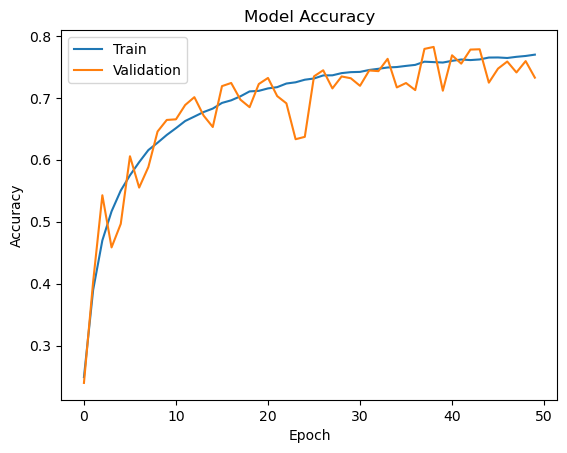

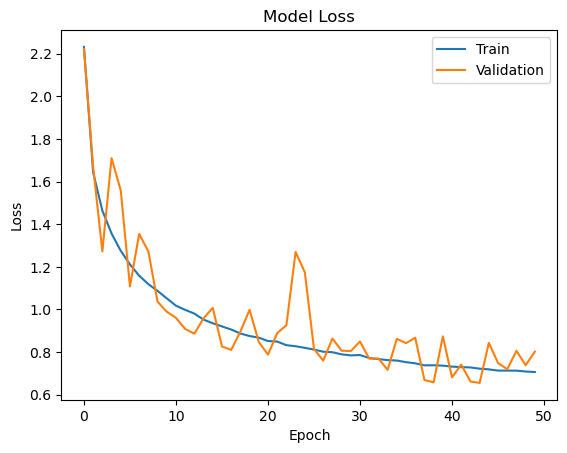

In [31]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Adding More layers and defining some of the parameters and building the model 

In [32]:
model3=Sequential()
model3.add(Conv2D(32,kernel_size=(3,3),kernel_initializer='he_uniform',padding='same',activation='relu',input_shape=(32,32,3)))
model3.add(BatchNormalization())
model3.add(Conv2D(32,kernel_size=(3,3),kernel_initializer='he_uniform',padding='same',activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(64,kernel_size=(3,3),kernel_initializer='he_uniform',padding='same',activation='relu',))
model3.add(BatchNormalization())
model3.add(Conv2D(64,kernel_size=(3,3),kernel_initializer='he_uniform',padding='same',activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.3))
model3.add(Conv2D(128,kernel_size=(3,3),kernel_initializer='he_uniform',padding='same',activation='relu'))
model3.add(BatchNormalization())
model3.add(Conv2D(128,kernel_size=(3,3),kernel_initializer='he_uniform',padding='same',activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.4))
model3.add(Flatten())
model3.add(Dense(128,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(128,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(128,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.5))
model3.add(Dense(10,activation='softmax'))

In [33]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [34]:
model3.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
history3=model3.fit(datagen.flow(X_train, y_train, batch_size=128), epochs=50, validation_data=(X_test,y_test))

Epoch 1/50
391/391 [==============================] - 319s 802ms/step - loss: 2.2086 - accuracy: 0.2497 - val_loss: 1.6226 - val_accuracy: 0.4067
Epoch 2/50
391/391 [==============================] - 347s 889ms/step - loss: 1.6206 - accuracy: 0.3942 - val_loss: 1.4752 - val_accuracy: 0.4573
Epoch 3/50
391/391 [==============================] - 277s 708ms/step - loss: 1.4250 - accuracy: 0.4789 - val_loss: 1.3698 - val_accuracy: 0.5278
Epoch 4/50
391/391 [==============================] - 265s 679ms/step - loss: 1.2993 - accuracy: 0.5347 - val_loss: 1.3349 - val_accuracy: 0.5458
Epoch 5/50
391/391 [==============================] - 255s 653ms/step - loss: 1.2054 - accuracy: 0.5738 - val_loss: 1.0830 - val_accuracy: 0.6167
Epoch 6/50
391/391 [==============================] - 265s 678ms/step - loss: 1.1157 - accuracy: 0.6100 - val_loss: 0.9570 - val_accuracy: 0.6581
Epoch 7/50
391/391 [==============================] - 248s 633ms/step - loss: 1.0643 - accuracy: 0.6320 - val_loss: 0.9554 -

In [36]:
score3=model3.evaluate(X_test, y_test, batch_size=10, verbose=1)

1000/1000 [==============================] - 15s 15ms/step - loss: 0.4834 - accuracy: 0.8453


In [37]:
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 0.4833897352218628
Test accuracy: 0.845300018787384


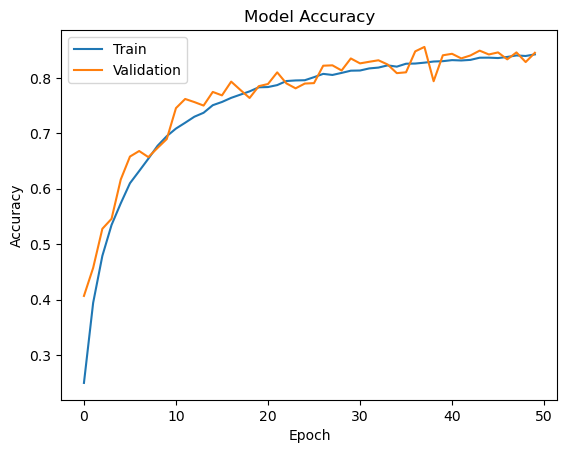

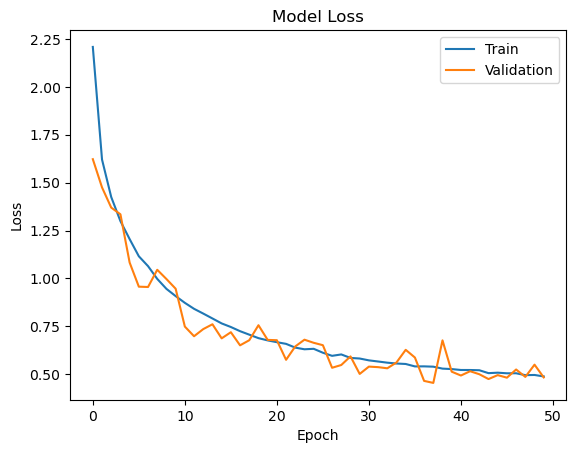

In [38]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

As we can see the above model gave an decent accuracy among all the others built. so predicting on this model 

In [40]:
y_pred = model3.predict(X_test)

313/313 [==============================] - 13s 40ms/step


In [41]:
y_pred_classes = np.argmax(y_pred, axis=1)

In [42]:
y_true = np.argmax(y_test, axis=1)

In [43]:
acc = (np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)))*100
print('Accuracy:', acc)

Accuracy: 84.53


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred_classes))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1000
           1       0.90      0.95      0.93      1000
           2       0.84      0.77      0.80      1000
           3       0.84      0.58      0.69      1000
           4       0.81      0.82      0.82      1000
           5       0.86      0.75      0.80      1000
           6       0.71      0.96      0.82      1000
           7       0.91      0.90      0.90      1000
           8       0.92      0.91      0.92      1000
           9       0.83      0.95      0.88      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.84     10000
weighted avg       0.85      0.85      0.84     10000



In [45]:
from collections import Counter
c=Counter(list(np.ravel(y_pred_classes)))
c.most_common

<bound method Counter.most_common of Counter({6: 1345, 9: 1150, 1: 1056, 4: 1012, 8: 985, 7: 983, 0: 981, 2: 917, 5: 877, 3: 694})>

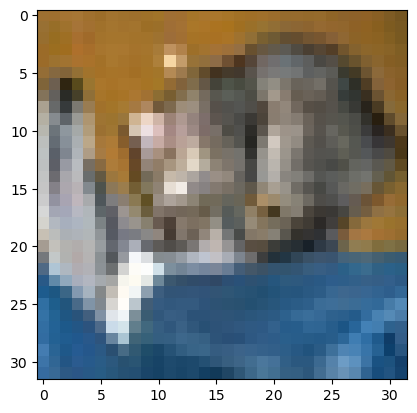

In [46]:
plt.imshow(X_test[np.where(y_pred_classes==3)][0])

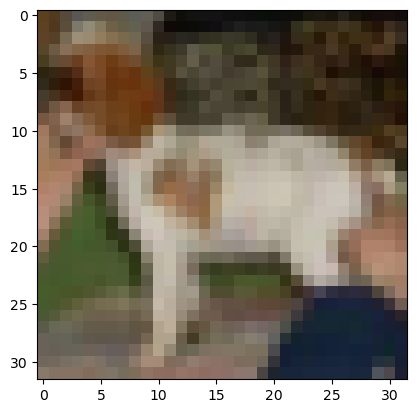

In [47]:
plt.imshow(X_test[np.where(y_pred_classes==5)][0])